In [96]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from  scipy import cluster as cluster
from scipy import interpolate
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
mpl.rcParams['xtick.major.pad']='0'
mpl.rcParams['ytick.major.pad']='0'
%config InlineBackend.figure_format = 'png'
#%matplotlib notebook

# Load data

In [9]:
traj_1 = np.loadtxt('trj1.txt')
traj_2 = np.loadtxt('trj2.txt')

In [10]:
xs = traj_1[:,0]
ys = traj_1[:,1]
zs = traj_1[:,2]

xs2 = traj_2[:,0]
ys2 = traj_2[:,1]
zs2 = traj_2[:,2]

xs_r = np.around(xs, decimals=1)
ys_r = np.around(ys, decimals=1)
xs2_r = np.around(xs2, decimals=1)
ys2_r = np.around(ys2, decimals=1)

sliced_t1 = np.around(traj_1[:,[0,1]],decimals=1)
sliced_t2 = np.around(traj_2[:,[0,1]],decimals=1)

In [11]:
xx1 = np.unique(xs_r)
yy1 = np.unique(ys_r)
xx2 = np.unique(xs2_r)
yy2 = np.unique(ys2_r)
print(xx1)
print(xx2)

[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]
[-0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4
  0.5  0.6  0.7  0.8  0.9]


In [12]:
test_1_r = np.around(traj_1[:,[0,1]],decimals= 1)
test_2_r = np.around(traj_2[:,[0,1]],decimals= 1)

 # Visualisation of Trajectories

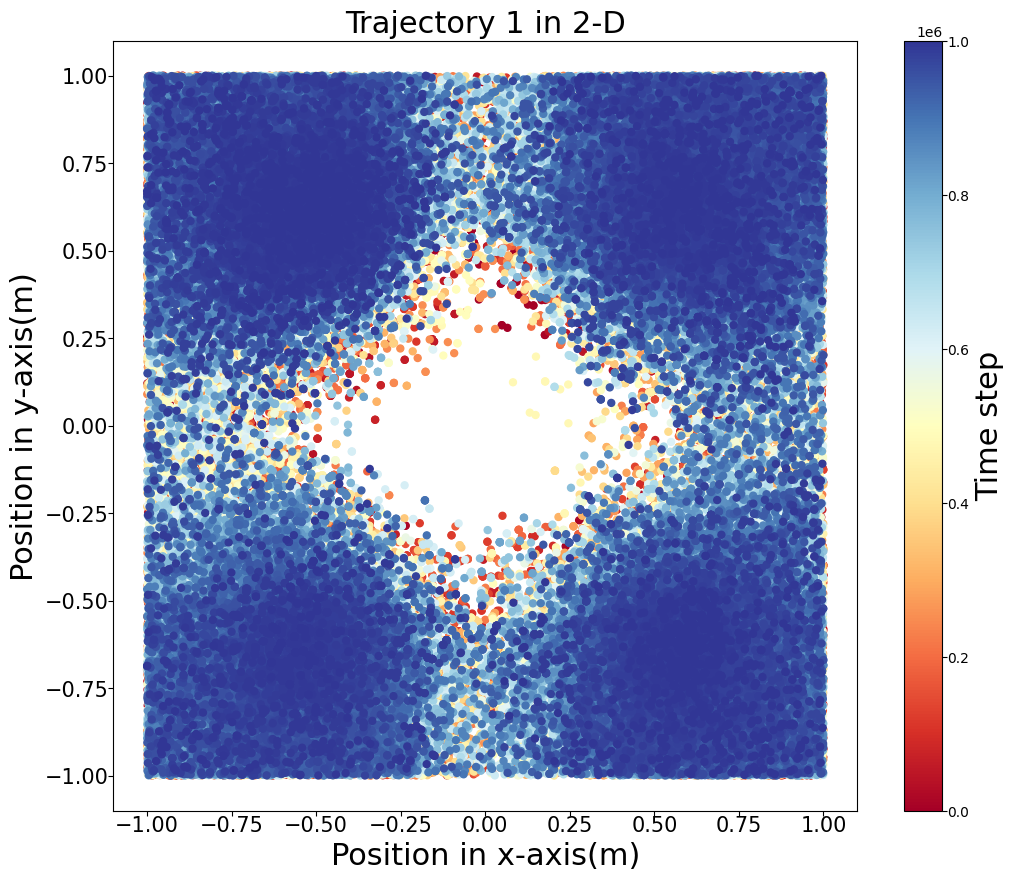

In [111]:
cm = plt.colormaps["RdYlBu"]
fig = plt.figure(figsize=(12,10))
plt.xlabel('Position in x-axis(m)', fontsize=22);
plt.ylabel('Position in y-axis(m)', fontsize=22);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

z = range(len(traj_1));
sc = plt.scatter(xs, ys, c=z, vmin=0, vmax=len(traj_1), s=25, cmap=cm)
clb = plt.colorbar(sc)
clb.set_label('Time step', fontsize=22)

plt.title('Trajectory 1 in 2-D', fontsize= 22)
plt.show()
fig.savefig('Traj_1_2d')

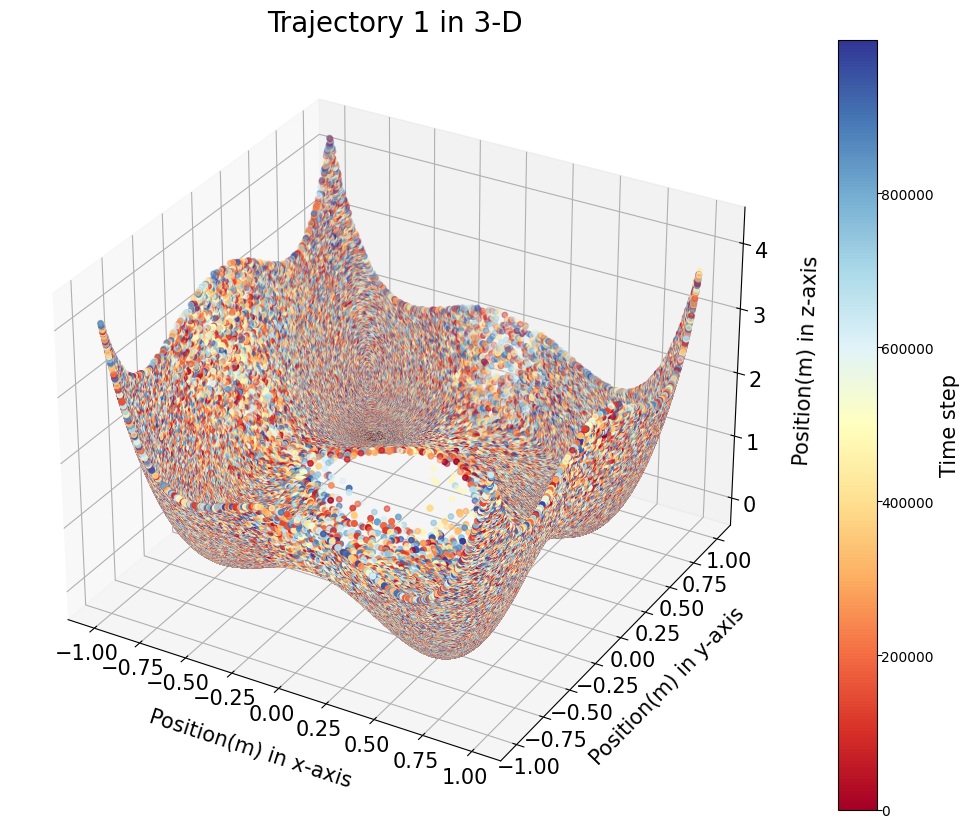

In [118]:
cm = plt.colormaps["RdYlBu"]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.set_xlabel('Position(m) in x-axis', fontsize=15, labelpad=10)
ax.set_ylabel('Position(m) in y-axis', fontsize=15, linespacing=3.2, labelpad=10)
ax.set_zlabel('Position(m) in z-axis', fontsize=15, linespacing=3.2,labelpad=10)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)
timestep = range(len(traj_1));
sc = ax.scatter3D(xs, ys, zs, s=15,c=timestep, depthshade=True, cmap = cm)
clb = plt.colorbar(sc)
clb.set_label('Time step', fontsize=15)
plt.title('Trajectory 1 in 3-D', fontsize=20)
plt.show()
fig.savefig('Traj_1_3d')

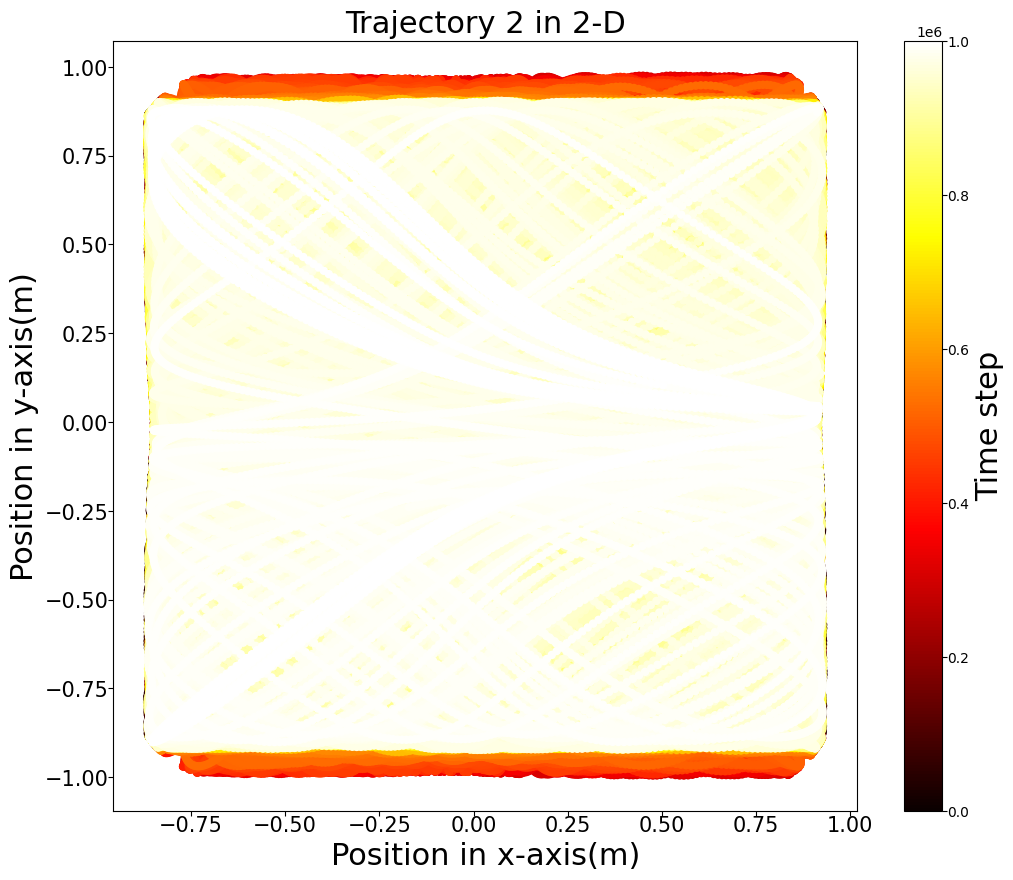

In [119]:
cm = plt.colormaps["hot"]
fig = plt.figure(figsize=(12,10))
plt.xlabel('Position in x-axis(m)', fontsize=22);
plt.ylabel('Position in y-axis(m)', fontsize=22);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
z = range(len(traj_2));
sc = plt.scatter(xs2, ys2, c=z, vmin=0, vmax=len(traj_1), s=25, cmap=cm)
clb = plt.colorbar(sc)
clb.set_label('Time step', fontsize=22 )
plt.title('Trajectory 2 in 2-D', fontsize= 22)
plt.show()
fig.savefig('Traj_2_2d')

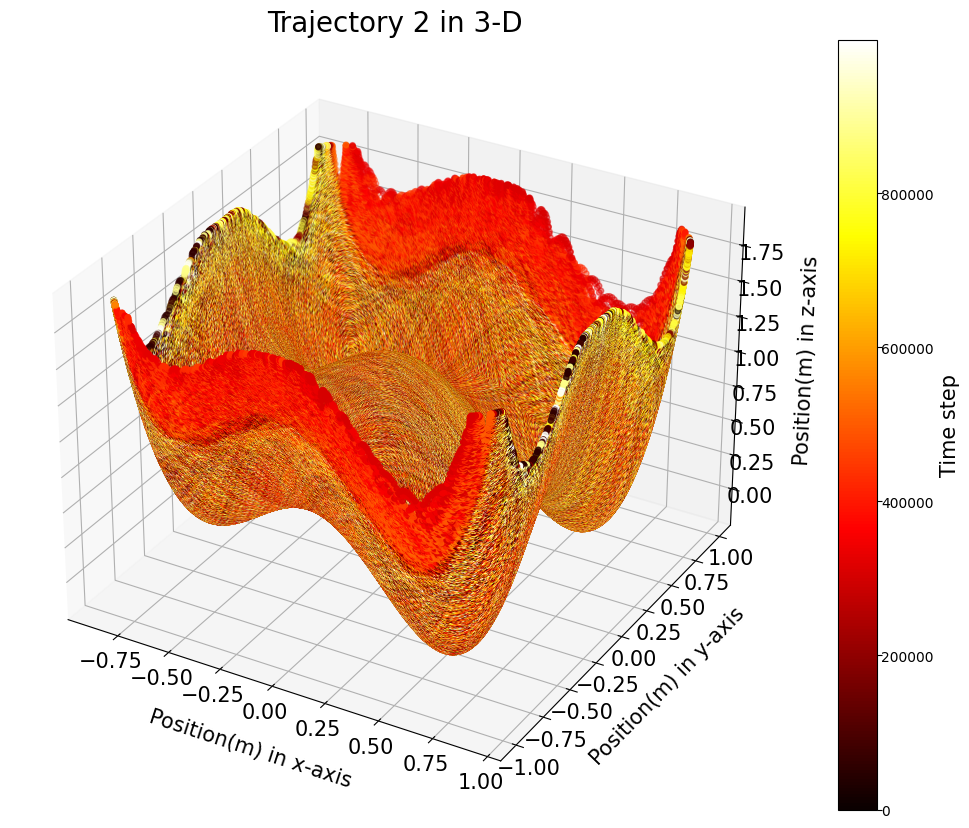

In [120]:
cm = plt.colormaps["hot"]
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1,projection="3d")
ax.set_xlabel('Position(m) in x-axis', fontsize=15, labelpad=10)
ax.set_ylabel('Position(m) in y-axis', fontsize=15, linespacing=3.2, labelpad=10)
ax.set_zlabel('Position(m) in z-axis', fontsize=15, linespacing=3.2,labelpad=10)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
timestep = range(len(traj_2));
sc = ax.scatter3D(xs2, ys2, zs2, s=15,c=timestep, cmap = cm)
clb = plt.colorbar(sc)
clb.set_label('Time step', fontsize=15)
plt.title('Trajectory 2 in 3-D', fontsize=20)
plt.show()
fig.savefig('Traj_2_3d_hot')

# 2-D Histograms

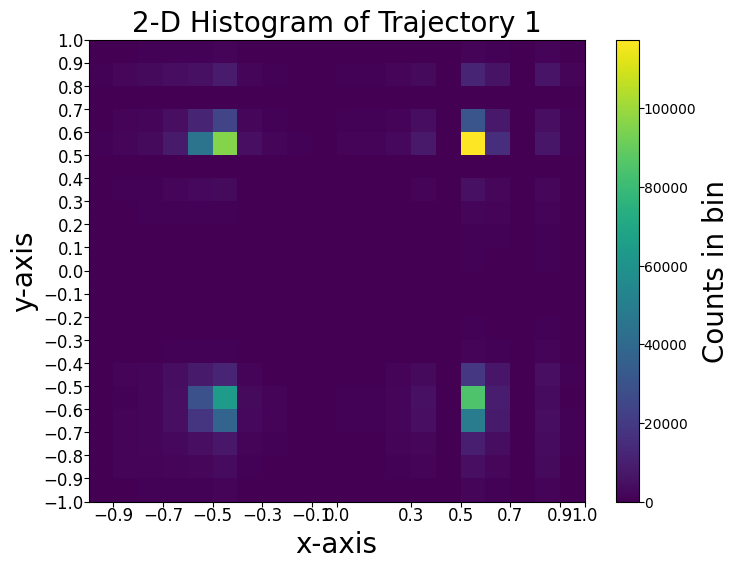

In [90]:
fig2 = plt.figure(figsize= (8,6))
plt.hist2d(xs_r, ys_r, bins=20)
plt.xlabel('x-axis', fontsize = 20)
plt.ylabel('y-axis', fontsize = 20)
plt.xticks([-.9, -.7, -.5, -.3,-.1, 0, 1.,  .3, .5, .7, .9])
plt.yticks(yy1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts in bin', fontsize = 20)
plt.title("2-D Histogram of Trajectory 1", fontsize = 20)
fig2.savefig('hist_traj_1')

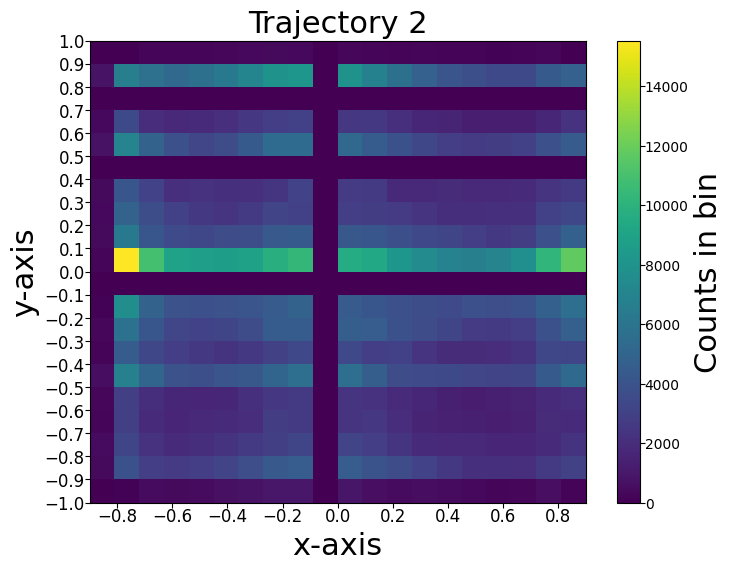

In [24]:
fig3 = plt.figure(figsize= (8,6))
plt.hist2d(xs2_r, ys2_r, bins=20)
plt.xlabel('x-axis',fontsize = 22)
plt.ylabel('y-axis',fontsize = 22)
#plt.xticks([-.1, -.8, -.6, -.4, 0 , .4,.6,.8,1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(yy1)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts in bin',fontsize = 22)
plt.title("Trajectory 2", fontsize = 22)
fig3.savefig('hist_traj_2')

## Probability and 3-D Histogram

In [26]:
average_matrix = np.zeros(shape=(21,21))
count_matrix = np.zeros(shape=(21,21))
sum_matrix = np.zeros(shape=(21,21))
relative_G_matrix = np.zeros(shape=(21,21))
probabilty_matrix = np.zeros(shape=(21,21))

count_matrix_2 = np.zeros(shape=(21,21))
sum_matrix_2 = np.zeros(shape=(21,21))
average_matrix_2 = np.zeros(shape=(21,21))
relative_G_matrix_2 = np.zeros(shape=(21,21))
probabilty_matrix_2 = np.zeros(shape=(21,21))

In [27]:
for i in range(len(traj_1)):
    x1 = int(10 * (test_1_r[i][0] + 1))
    y1 = int(10 * (test_1_r[i][1] + 1))
    sum_matrix [x1][y1] += traj_1[i][2]
    count_matrix[x1][y1] += 1

probabilty_matrix = count_matrix/len(traj_1)
P_max = np.max(probabilty_matrix)

for i in range(21):
    for j in range(21):
        if count_matrix[i][j] == 0:
            average_matrix[i][j] = 0
            relative_G_matrix[i][j] = 0
        else:
            average_matrix[i][j] = sum_matrix[i][j] / count_matrix[i][j]
            relative_G_matrix[i][j] = - np.log(probabilty_matrix[i][j]/P_max)


In [28]:
for i in range(len(traj_2)):
    x2 = int(10 * (test_2_r[i][0] + 1))
    y2 = int(10 * (test_2_r[i][1] + 1))
    sum_matrix_2[x2][y2] += traj_2[i][2]
    count_matrix_2[x2][y2] += 1

probabilty_matrix_2 = count_matrix_2/len(traj_2)
p_max2 = np.max(probabilty_matrix_2)

for i in range(21):
    for j in range(21):
        if count_matrix_2[i][j] == 0:
            average_matrix_2[i][j] = 0
            relative_G_matrix_2[i][j] = 0
        else:
            average_matrix_2[i][j] = sum_matrix_2[i][j] / count_matrix_2[i][j]
            relative_G_matrix_2[i][j] = - np.log(probabilty_matrix_2[i][j]/p_max2)


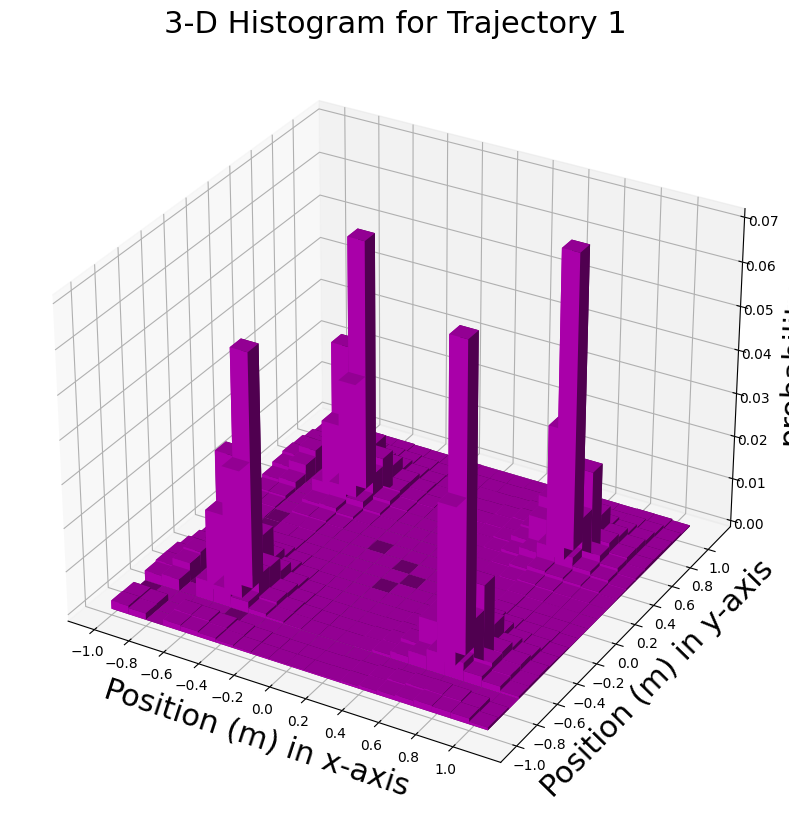

In [105]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#hist, xedges, yedges = np.histogram2d(x3, y3, bins=4)
# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xx1, yy1)
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
dx = dy = 0.1
dz = probabilty_matrix.ravel()
#print(dx)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='m')
plt.xticks(xx1[::2])
plt.yticks(yy1[::2])
ax.set_xlabel('Position (m) in x-axis', fontsize = 22)
ax.set_ylabel('Position (m) in y-axis', fontsize = 22)
ax.set_zlabel('probability',fontsize = 22)
plt.title('3-D Histogram for Trajectory 1', fontsize = 22);
for t in ax.zaxis.get_major_ticks(): t.label2.set_fontsize(15)
plt.show()
fig.savefig('3D_hist_Traj_1')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


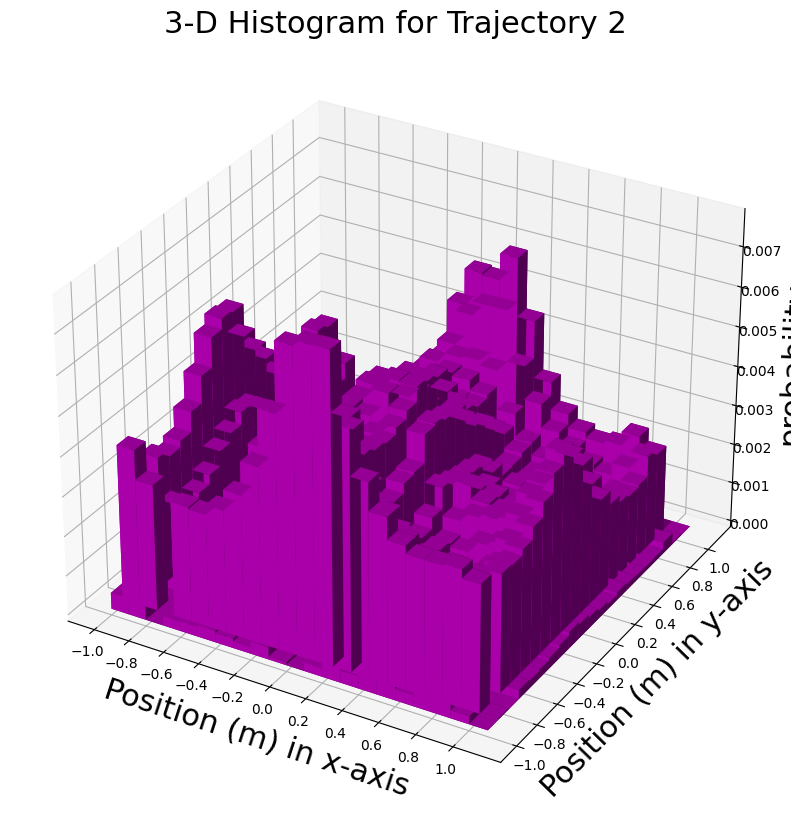

In [121]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#hist, xedges, yedges = np.histogram2d(x3, y3, bins=4)
# Construct arrays for the anchor positions of the 16 bars.
xpos2, ypos2 = np.meshgrid(xx1, yy1)
xpos2 = xpos2.ravel()
ypos2 = ypos2.ravel()
zpos2 = 0
dx2 = dy2 = 0.1
dz2 = probabilty_matrix_2.ravel()
#print(dx)
ax.bar3d(xpos2, ypos2, zpos2, dx2, dy2, dz2, color='m')
plt.xticks(xx1[::2])
plt.yticks(yy1[::2])
ax.set_xlabel('Position (m) in x-axis', fontsize = 22)
ax.set_ylabel('Position (m) in y-axis', fontsize = 22)
ax.set_zlabel('probability',fontsize = 22)
plt.title('Trajectory 2', fontsize = 22);
plt.title('3-D Histogram for Trajectory 2', fontsize = 22);
for t in ax.zaxis.get_major_ticks(): t.label2.set_fontsize(15)
plt.show()
fig.savefig('3D_hist_Traj_2')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Trajectory at later stages of simulation

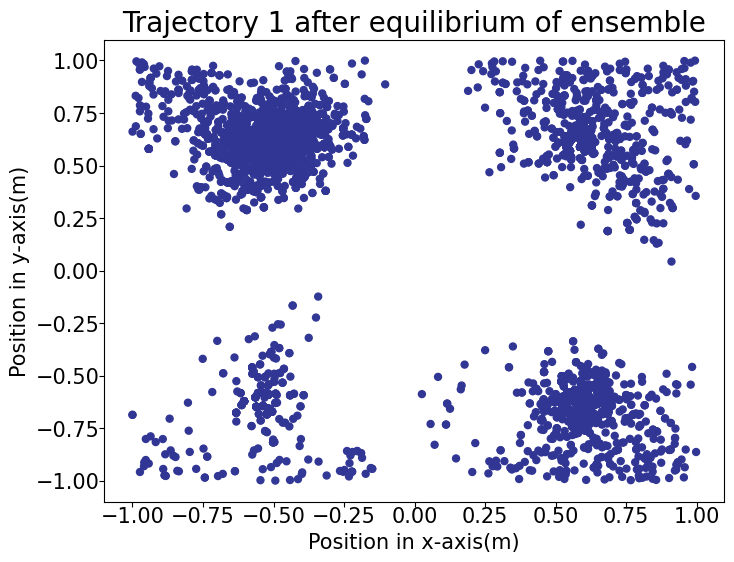

In [123]:
cm = plt.colormaps["RdYlBu"]
fig = plt.figure(figsize= (8,6))
plt.xlabel('Position in x-axis(m)', fontsize=15);
plt.ylabel('Position in y-axis(m)', fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
z_later = np.arange(995000,1000000,1);
sc_later = plt.scatter(xs[995000:1000000], ys[995000:1000000], c=z_later, vmin=0, vmax=len(traj_1), s=25, cmap=cm)
plt.title('Trajectory 1 after equilibrium of ensemble', fontsize=20)
plt.show()
fig.savefig('Traj_1_2d_later')

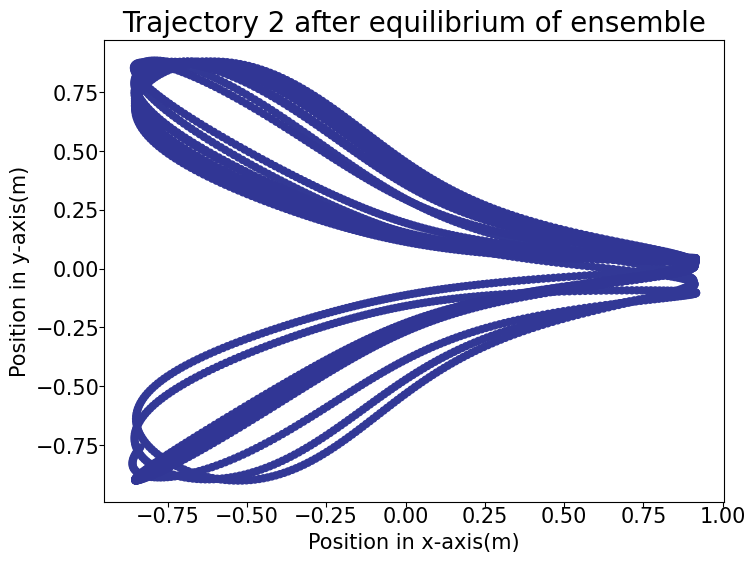

In [125]:
cm = plt.colormaps["RdYlBu"]
fig = plt.figure(figsize= (8,6))
plt.xlabel('Position in x-axis(m)', fontsize=15);
plt.ylabel('Position in y-axis(m)', fontsize=15);
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
z_later = np.arange(995000,1000000,1);
sc_later = plt.scatter(xs2[995000:1000000], ys2[995000:1000000], c=z_later, vmin=0, vmax=len(traj_1), s=25, cmap=cm)
plt.title('Trajectory 2 after equilibrium of ensemble', fontsize=20)
plt.show()
fig.savefig('Traj_2_2d_later')

# Determining The Optimal Number Of Clusters :

Elbow method:

The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized.
The total WSS measures the compactness of the clustering and we want it to be as small as possible.
Then, plot a line chart of the WSS for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.
The idea is that we want a small WSS, but that the SSE tends to decrease toward 0 as we increase k (the WSS is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).
So our goal is to choose a small value of k that still has a low WSS,
and the elbow usually represents where we start to have diminishing returns by increasing k.

The Elbow method looks at the total WSS as a function of the number of clusters:
One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

The optimal number of clusters can be defined as follow:

1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

#### Elbow Method for trajectory one

In [127]:
def elbow_cal(k):
    centroid, labels = cluster.vq.kmeans2(sliced_t1, k, iter=10, thresh=1e-05, minit='random', missing='warn', check_finite=True)
    wss = np.zeros(len(traj_1))
    #for Trajectory 1: computes sum of all squared intra cluster distances
    for j in range(len(traj_1)):
        wss[j] = np.linalg.norm(sliced_t1[j] - centroid[labels[j]])**2
    return np.sum(wss)

In [128]:
elbow = np.zeros(6)
for i in range(6):
    elbow[i] = elbow_cal(i + 1) # elbow[0] is for k = 1

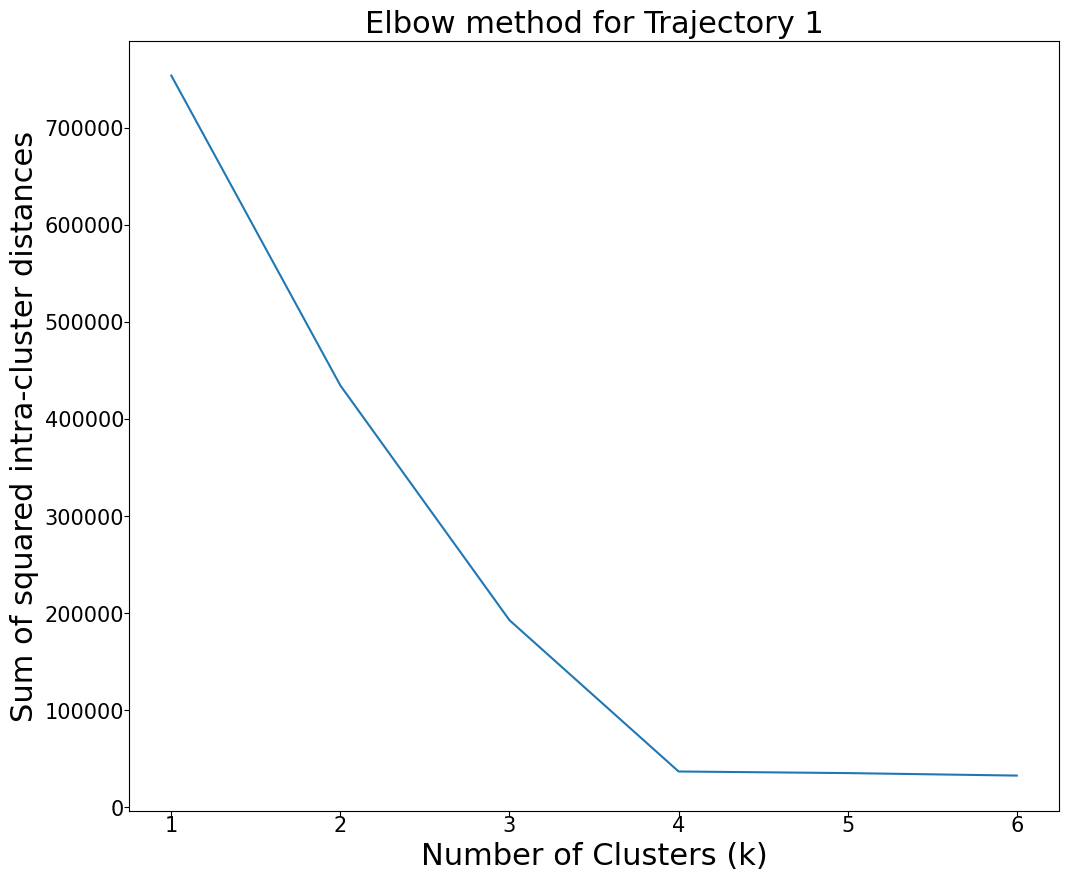

In [129]:
elbow_x = np.arange(6)
fig = plt.figure(figsize=(12, 10))
plt.xlabel('Number of Clusters (k)', fontsize = 22)
plt.ylabel('Sum of squared intra-cluster distances', fontsize = 22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Elbow method for Trajectory 1', fontsize = 22);
plt.plot(elbow_x + 1, elbow[elbow_x])
plt.savefig('Elbow_method_2')

In [60]:
def elbow_cal_t2(k):
    centroid, labels = cluster.vq.kmeans2(sliced_t2, k, iter=10, thresh=1e-05, minit='random', missing='warn', check_finite=True)
    wss = np.zeros(len(traj_2))
    #for Trajectory 1: computes sum of all squared intra cluster distances
    for j in range(len(traj_2)):
        wss[j] = np.linalg.norm(sliced_t2[j] - centroid[labels[j]])**2
    return np.sum(wss)

In [61]:
elbow_2 = np.zeros(6)
for i in range(6):
    elbow_2[i] = elbow_cal_t2(i + 1) # elbow[0] is for k = 1

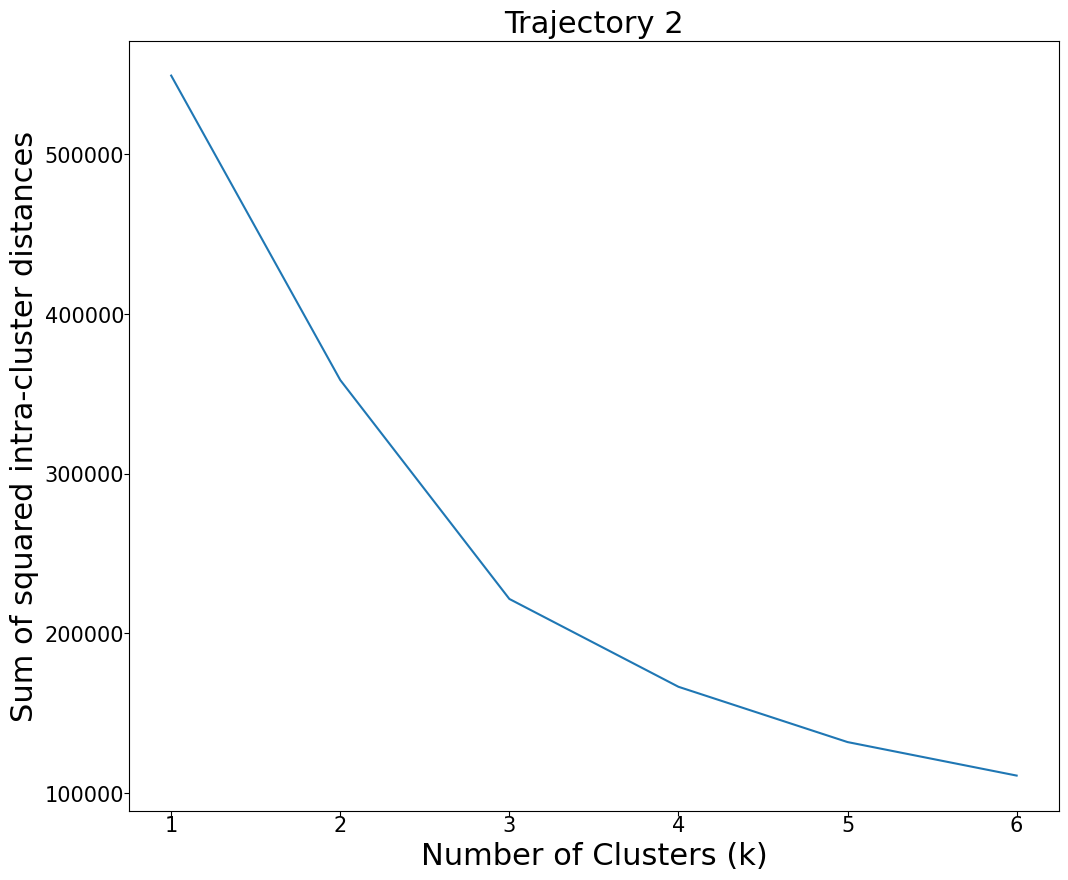

In [62]:
fig = plt.figure(figsize=(12, 10))
plt.xlabel('Number of Clusters (k)', fontsize = 22)
plt.ylabel('Sum of squared intra-cluster distances', fontsize = 22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Trajectory 2', fontsize = 22);
plt.plot(elbow_x + 1, elbow_2[elbow_x])
plt.savefig('Elbow_method_tr2')

# Kmean clustering for 4 centroids for trajectory 1

In [130]:
#centroids, C = kMeans(data_points, K = 4, plot_progress = show)
centroids_4, labels_4 = cluster.vq.kmeans2(sliced_t1, 4, iter=10, thresh=1e-05, minit='random', missing='warn', check_finite=True)

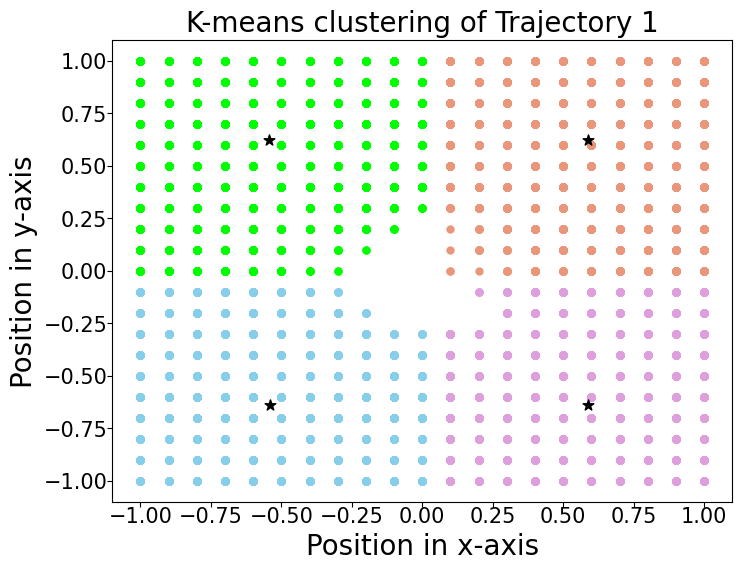

In [131]:
cm = plt.colormaps["RdYlBu"]
fig = plt.figure(figsize=(8,6))
plt.xlabel('Position in x-axis', fontsize = 20);
plt.ylabel('Position in y-axis', fontsize = 20);
plt.title('Trajectory 1', fontsize = 20 );
z = range(len(traj_1));
#sc = plt.scatter(sliced_t1, ys, c=z, vmin=0, vmax=len(traj_1), s=25, cmap=cm)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(sliced_t1[labels_4 == 0, 0], sliced_t1[labels_4 == 0, 1], s=25, c='plum')
plt.scatter(sliced_t1[labels_4 == 1, 0], sliced_t1[labels_4 == 1, 1], s=25, c='skyblue')
plt.scatter(sliced_t1[labels_4 == 2, 0], sliced_t1[labels_4 == 2, 1], s=25, c='darksalmon')
plt.scatter(sliced_t1[labels_4 == 3, 0], sliced_t1[labels_4 == 3, 1], s=25, c='lime')

sc1 = plt.scatter(centroids_4[:,0], centroids_4[:,1], s=65, c = 'black', marker= '*')
plt.title('K-means clustering of Trajectory 1', fontsize = 20)
plt.show()
fig.savefig('Clusters_tr1')

# Clustering for trajectory 2

In [132]:
centroids_4_t2, labels_4_t2 = cluster.vq.kmeans2(sliced_t2, 4, iter=10, thresh=1e-05, minit='random', missing='warn', check_finite=True)

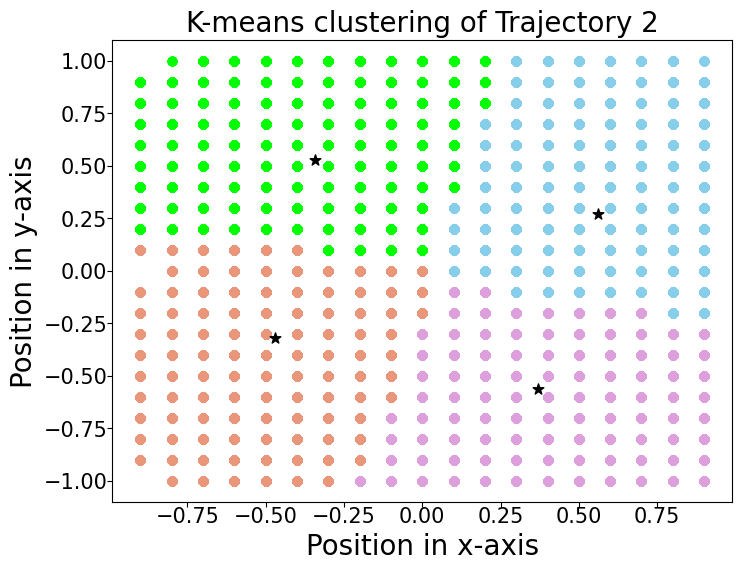

In [133]:
cm = plt.colormaps["RdYlBu"]
fig = plt.figure(figsize=(8,6))
plt.xlabel('Position in x-axis', fontsize = 20);
plt.ylabel('Position in y-axis', fontsize = 20);
plt.title('Trajectory 2',fontsize = 20 );
z = range(len(traj_2));

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.scatter(sliced_t2[labels_4_t2 == 0, 0], sliced_t2[labels_4_t2 == 0, 1], c='plum')
plt.scatter(sliced_t2[labels_4_t2 == 1, 0], sliced_t2[labels_4_t2 == 1, 1], c='skyblue')
plt.scatter(sliced_t2[labels_4_t2 == 2, 0], sliced_t2[labels_4_t2 == 2, 1], c='darksalmon')
plt.scatter(sliced_t2[labels_4_t2 == 3, 0], sliced_t2[labels_4_t2 == 3, 1], c='lime')

sc2 = plt.scatter(centroids_4_t2[:,0], centroids_4_t2[:,1], s=65, c = 'black', marker= '*')
plt.title('K-means clustering of Trajectory 2', fontsize = 20)
plt.show()
#plt.gca().legend(('0th','1st', '2nd', '3rd'))
fig.savefig('Clusters_t2')

# Potential Energy

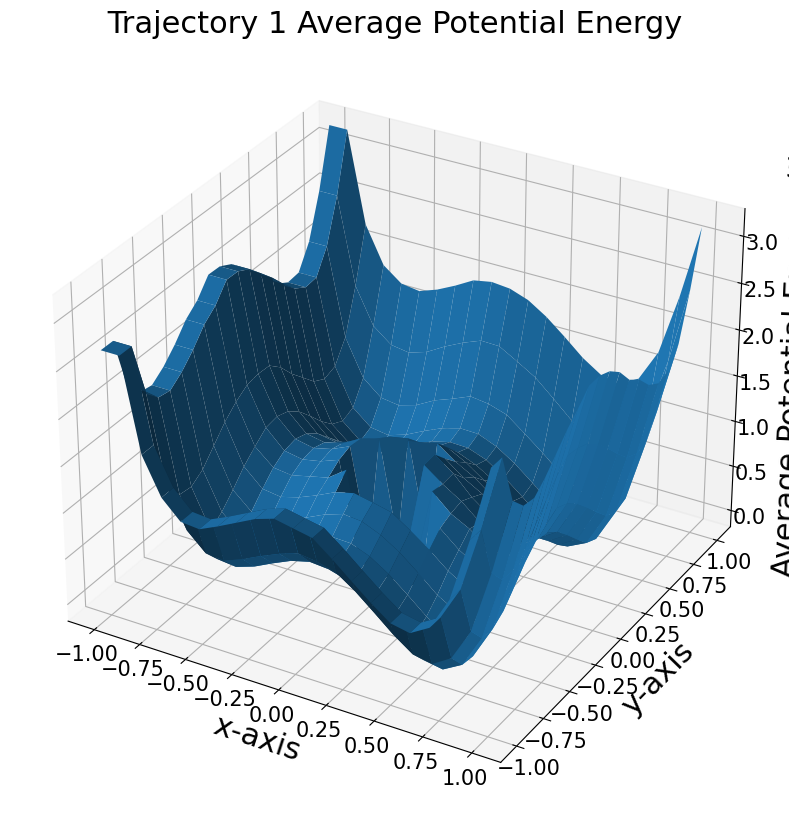

In [40]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
X1, Y1 = np.meshgrid(xx1, yy1)
zz = np.array([average_matrix[int(10 * (i + 1))][int(10 * (j + 1))] for i,j in zip(np.ravel(X1), np.ravel(Y1))])
Z1 = zz.reshape(X1.shape)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1,edgecolor='none')
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)
ax.set_xlabel('x-axis',linespacing=3.2,fontsize=22 )
ax.set_ylabel('y-axis', linespacing=3.2,fontsize=22)
ax.set_zlabel('Average Potential Energy (J)',linespacing=3.2,fontsize=22)
#plt.title(' Trajectory 1 Average Potential Energy ',fontsize=22);
fig.savefig('b_Traj_1_main_average.png')

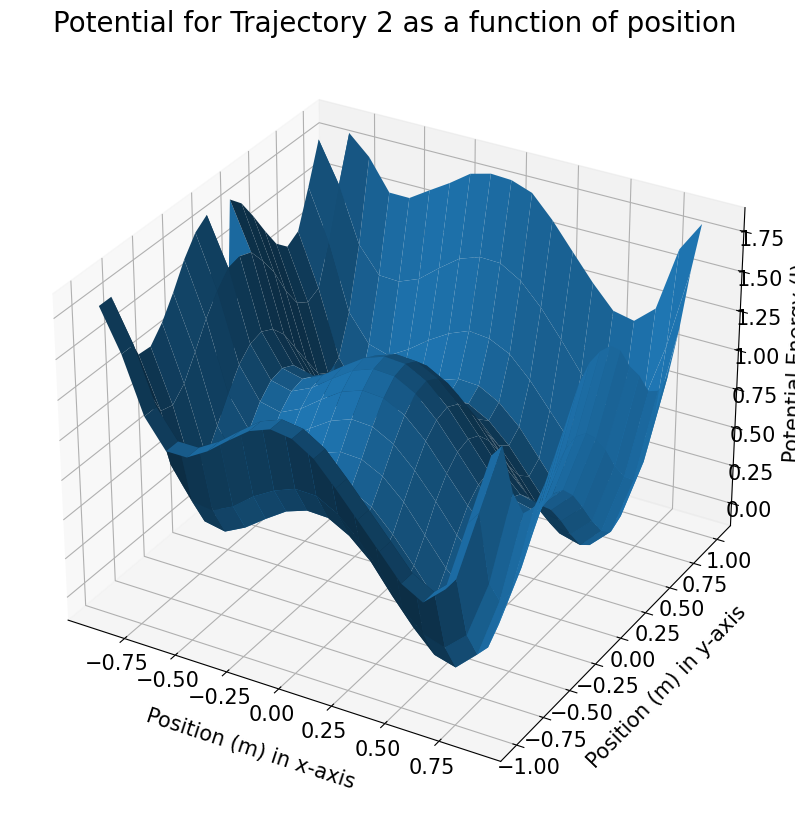

In [146]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
X2, Y2 = np.meshgrid(xx2, yy2)
zz2 = np.array([average_matrix_2[int(10 * (i + 1))][int(10 * (j + 1))] for i,j in zip(np.ravel(X2), np.ravel(Y2))])
Z2 = zz2.reshape(X2.shape)
ax.plot_surface(X2, Y2, Z2, rstride=1, cstride=1,edgecolor='none')
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Position (m) in x-axis',linespacing=3.2,fontsize=15,labelpad=10 )
ax.set_ylabel('Position (m) in y-axis',linespacing=3.2,fontsize=15, labelpad=10)
ax.set_zlabel('Potential Energy (J)',linespacing=3.2,fontsize=15,labelpad=5)
# splt.title(' Trajectory 2 Average Potential Energy',fontsize=22);
plt.title('Potential for Trajectory 2 as a function of position', fontsize=20);
fig.savefig('b_Traj_2_main_average.png')

## Visualisation of potential energy with another view

In [42]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.mgrid.html
grid_x, grid_y = np.mgrid[-1:1:21j, -1:1:21j]
X2, Y2 = np.meshgrid(xx2, yy2)

In [43]:
grid_z2 = griddata(np.around(traj_1[:,[0,1]],decimals=1), traj_1[0:,2], (grid_x, grid_y), method='cubic')
grid_z2_t2 = griddata(np.around(traj_2[:,[0,1]],decimals=1), traj_2[0:,2], (X2, Y2), method='cubic')
grid_z2_t2[np.isnan(grid_z2_t2)]=0

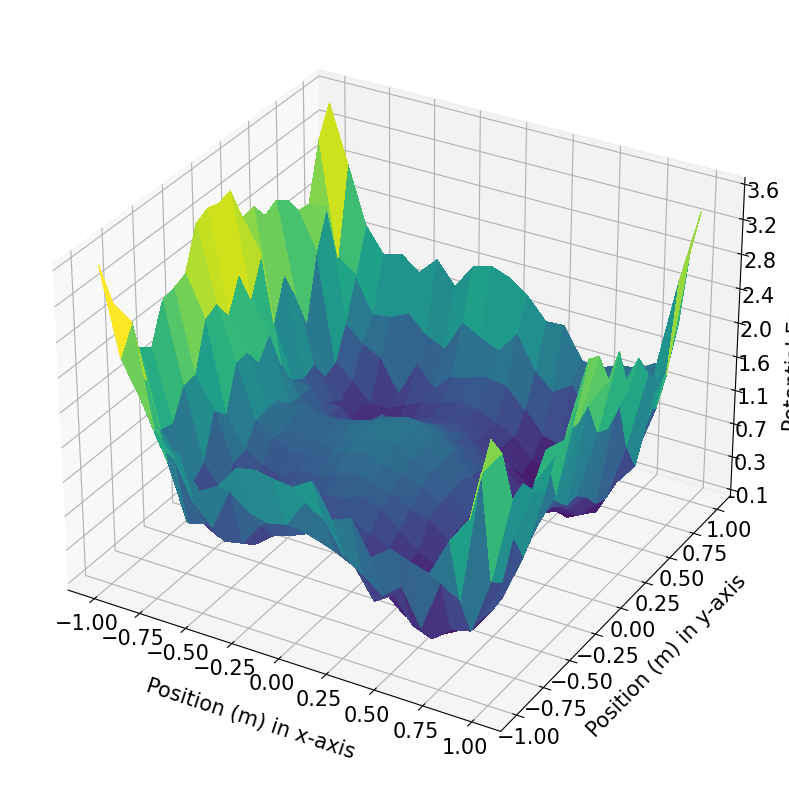

In [144]:
cm = plt.colormaps["viridis"]
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z2, rstride=1,shade= True, cstride=1,edgecolor='none',cmap =cm, linewidth=0, antialiased=False )
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_xlabel('Position (m) in x-axis',linespacing=3.2,fontsize=15,labelpad=10 )
ax.set_ylabel('Position (m) in y-axis',linespacing=3.2,fontsize=15, labelpad=10)
ax.set_zlabel('Potential Energy (J)',linespacing=3.2,fontsize=15,labelpad=5)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)

fig.savefig('function_Traj_1')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01f'))

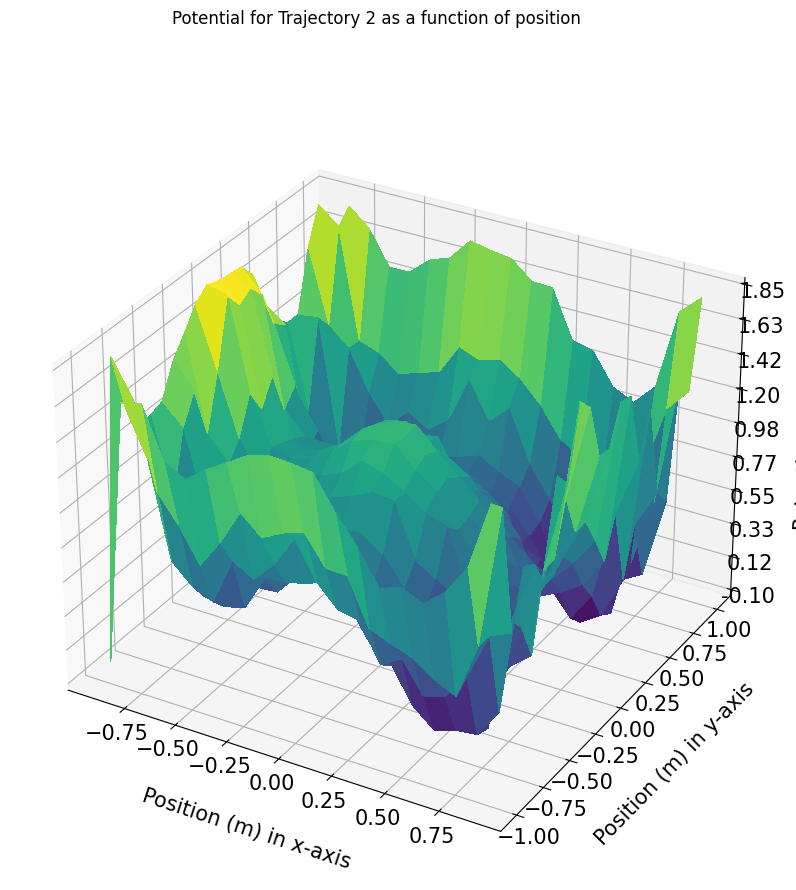

In [142]:
cm = plt.colormaps["viridis"]
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.plot_surface(X2, Y2, grid_z2_t2, rstride=1, cstride=1,shade= True,cmap = cm, edgecolor='none',linewidth=0, antialiased=False )
ax.set_xlabel('Position (m) in x-axis',linespacing=3.2,fontsize=15,labelpad=15 )
ax.set_ylabel('Position (m) in y-axis',linespacing=3.2,fontsize=15, labelpad=15)
ax.set_zlabel('Potential Energy (J)',linespacing=3.2,fontsize=15,labelpad=10)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)
plt.suptitle('Potential for Trajectory 2 as a function of position');
fig.savefig('function_Traj_2')
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

In [ ]:
print((traj_2[np.where(traj_2[0:,2]<0)]))

## Relative Free Energy

The free energy surface should be equal to dG = -KbT* ln P, where P is the probability.
If you multiply the frequencies by the weights, we get probabilities. Check, if the integral of the weighted frequencies yields 1. Otherwise we have to normalize the histogram.
Next, we have to just scale the logarithm of the normalized weighted frequencies by the factor -RT.
If taken R and T as one, we can say Relative Free energy = -KbT * ln P/Pmax


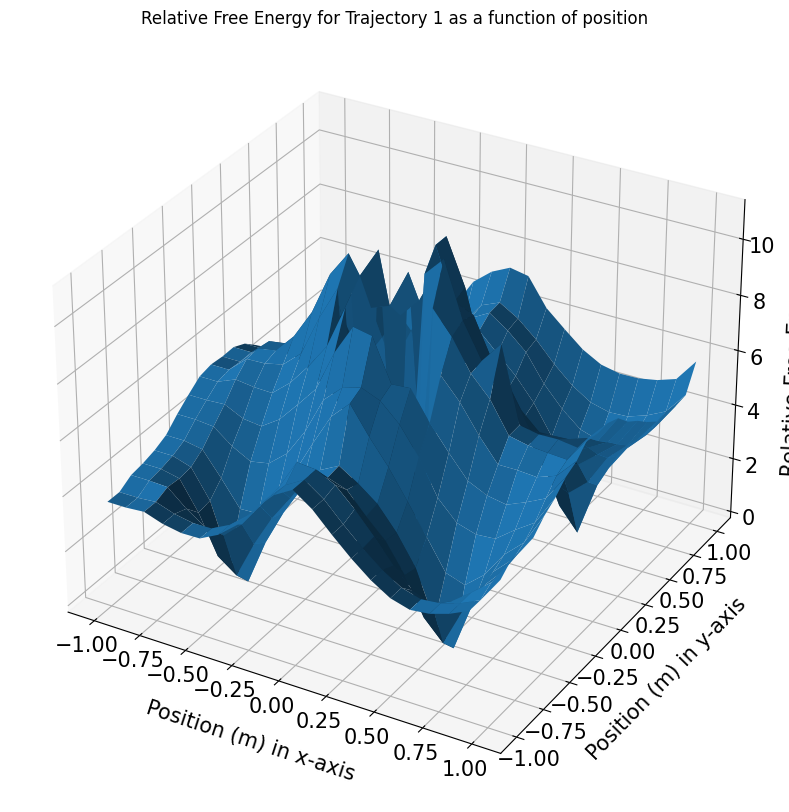

In [140]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
X1 ,Y1 = np.meshgrid(xx1,yy1)

zz1_free = np.array([relative_G_matrix[int(10 * (i + 1))][int(10 * (j + 1))] for i,j in zip(np.ravel(X1), np.ravel(Y1))])
Z1_free = zz1_free.reshape(X1.shape)

ax.plot_surface(X1, Y1, Z1_free, rstride=1, cstride=1,edgecolor='none')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(15)
ax.set_xlabel('Position (m) in x-axis', fontsize =15 , labelpad=10)
ax.set_ylabel('Position (m) in y-axis', fontsize =15, labelpad=10)
ax.set_zlabel('Relative Free Energy (J)', fontsize =15, labelpad=5)
plt.title('Relative Free Energy for Trajectory 1 as a function of position');
fig.savefig('free_traj_1.png')



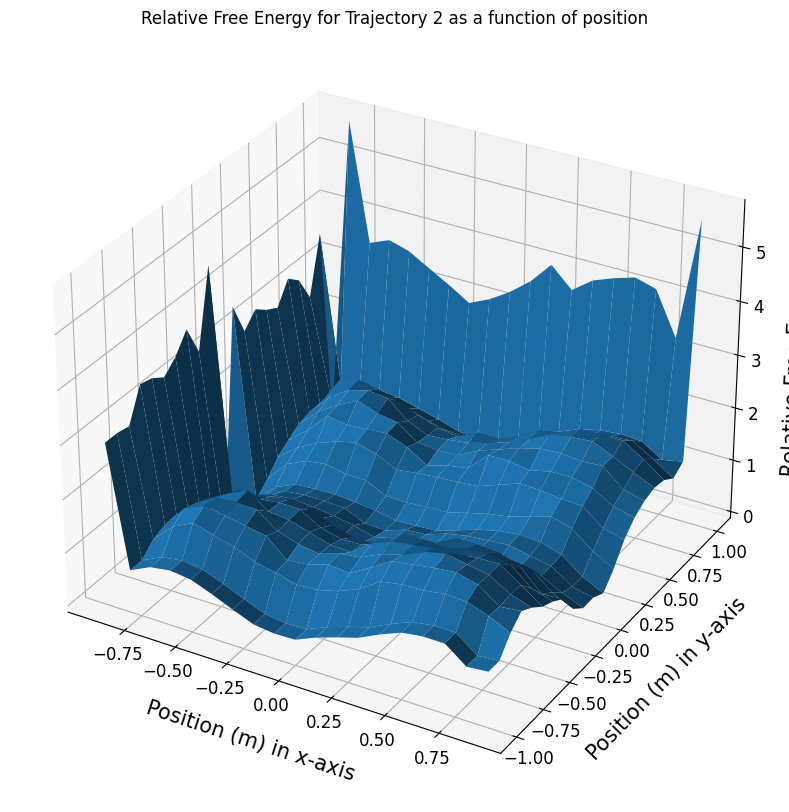

In [139]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
X1 ,Y1 = np.meshgrid(xx1,yy1)
zz2_free = np.array([relative_G_matrix_2[int(10 * (i + 1))][int(10 * (j + 1))] for i,j in zip(np.ravel(X2), np.ravel(Y2))])
Z2_free = zz2_free.reshape(X2.shape)

ax.plot_surface(X2, Y2, Z2_free, rstride=1, cstride=1,edgecolor='none')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for t in ax.zaxis.get_major_ticks(): t.label1.set_fontsize(12)
ax.set_xlabel('Position (m) in x-axis', fontsize =15 , labelpad=10)
ax.set_ylabel('Position (m) in y-axis', fontsize =15, labelpad=10)
ax.set_zlabel('Relative Free Energy (J)', fontsize =15, labelpad=5)
plt.title('Relative Free Energy for Trajectory 2 as a function of position');
fig.savefig('free_traj_2.png')